# Convolutional Neural Network

In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('PlantVillage/Training',
                                                 target_size = (227, 227),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1978 images belonging to 2 classes.


### Preprocessing the Test set

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('PlantVillage/Testing',
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 496 images belonging to 2 classes.


In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model = model.fit(x = training_set, validation_data = test_set, epochs = 16)

Epoch 1/16
62/62 [==============================] - 282s 5s/step - loss: 14.7460 - accuracy: 0.6630 - val_loss: 39.1198 - val_accuracy: 0.5968
Epoch 2/16
62/62 [==============================] - 284s 5s/step - loss: 0.5235 - accuracy: 0.8878 - val_loss: 3.1646 - val_accuracy: 0.6835
Epoch 3/16
62/62 [==============================] - 290s 5s/step - loss: 0.3237 - accuracy: 0.9152 - val_loss: 4.2302 - val_accuracy: 0.6371
Epoch 4/16
62/62 [==============================] - 284s 5s/step - loss: 0.2999 - accuracy: 0.9181 - val_loss: 0.3954 - val_accuracy: 0.8770
Epoch 5/16
62/62 [==============================] - 291s 5s/step - loss: 0.2571 - accuracy: 0.9115 - val_loss: 0.3913 - val_accuracy: 0.9073
Epoch 6/16
62/62 [==============================] - 293s 5s/step - loss: 0.1934 - accuracy: 0.9482 - val_loss: 0.0916 - val_accuracy: 0.9698
Epoch 7/16
62/62 [==============================] - 295s 5s/step - loss: 0.1500 - accuracy: 0.9516 - val_loss: 0.5010 - val_accuracy: 0.9093
Epoch 8/16


In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('PlantVillage/predict/healthy.jpg', target_size = (96, 96))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Healthy Pepper'
else:
  prediction = 'Bacteria Pepper'

AttributeError: 'History' object has no attribute 'predict'

In [17]:
print(prediction)

Bacteria Pepper


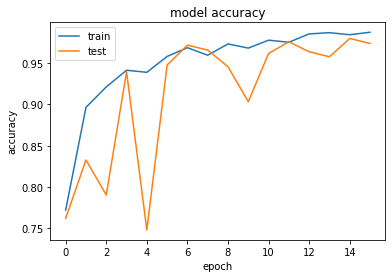

In [14]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

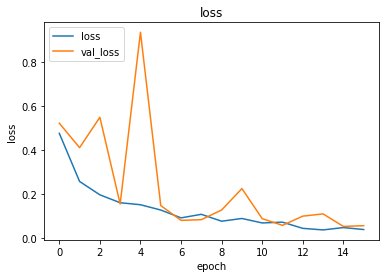

In [15]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()